In [66]:
import pandas as pd
import requests
import json
import time
import datetime
import os
import json
from tqdm import tqdm_notebook as tqdm
import bz2
import re
import matplotlib.pyplot as plt

In [67]:
os.chdir('D:/UofT/CSC2552/Project_Proposal/Data/Sample Data')

# Reading Submissions on Reddit during Nov, 2016

In [68]:
bz_file = bz2.BZ2File('RS_2016-11.bz2')

In [ ]:
#News Website to look for 
#news_source="((news\.yahoo\.com)|(news\.google\.com)|(huffpost\.com)|(cnn\.com)|(nytimes\.com))"

#Reading Submissions
subreddit_dict={"link_flair_text":[],"url":[],
                "id":[],"created_utc":[],"title":[],
                "author_flair_text":[],"author":[],
               "selftext":[],"domain":[],"num_comments":[],"subreddit_id":[],"score":[],"permalink":[],
               "subreddit":[]}

i=0
for line in tqdm(bz_file):
    subreddit_json=json.loads(line.decode("utf-8"))
    if subreddit_json!=None and subreddit_json!={} :
    #and re.search(news_source,subreddit_json["url"])!=None:
        if(i%100000==0):
            print(i)
        i+=1
        
        if("subreddit_id" not in subreddit_json.keys()):
            continue
            
        subreddit_dict["link_flair_text"].append(subreddit_json["link_flair_text"])
        subreddit_dict["url"].append(subreddit_json["url"])
        subreddit_dict["id"].append(subreddit_json["id"])
        subreddit_dict["created_utc"].append(subreddit_json["created_utc"])
        subreddit_dict["permalink"].append(subreddit_json["permalink"])
        subreddit_dict["subreddit"].append(subreddit_json["subreddit"])
        subreddit_dict["title"].append(subreddit_json["title"])
        subreddit_dict["author_flair_text"].append(subreddit_json["author_flair_text"])
        subreddit_dict["author"].append(subreddit_json["author"])
        subreddit_dict["selftext"].append(subreddit_json["selftext"])
        subreddit_dict["domain"].append(subreddit_json["domain"])
        subreddit_dict["num_comments"].append(subreddit_json["num_comments"])
        subreddit_dict["subreddit_id"].append(subreddit_json["subreddit_id"])
        subreddit_dict["score"].append(subreddit_json["score"])

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000


In [17]:
# Subreddit data frame
subreddit_dat=pd.DataFrame(subreddit_dict)

In [18]:
#Saving to CSV file
subreddit_dat.to_csv("Submissions_Nov2016", sep=',', encoding='utf-8')

# Identifying URLs to analyse

In [34]:
subreddit_dat=pd.read_csv("Submissions_Nov2016", sep=',', encoding='utf-8')

C:\Users\bhara\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,5,6,7,8,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
web_source="([a-zA-Z]+\.((com)|(org)|(gov)))"
subreddit_dat["web_source"]=subreddit_dat["url"].str.extract(web_source)[0]
subreddit_dat_url_cnt=subreddit_dat.groupby(["web_source"],as_index=False).agg({'id':'nunique','subreddit_id':'nunique'})
subreddit_dat_url_cnt=subreddit_dat_url_cnt.sort_values(by=['subreddit_id','id'],ascending=False)

In [36]:
# Remove self generated content
subreddit_dat_url_cnt=subreddit_dat_url_cnt.sort_values(by=['subreddit_id','id'],ascending=False)
#subreddit_dat_url_cnt=subreddit_dat_url_cnt[~(subreddit_dat_url_cnt["web_source"].str.contains("reddit"))]
subreddit_dat_url_cnt[subreddit_dat_url_cnt["subreddit_id"]>100]
subreddit_dat_url_cnt=subreddit_dat_url_cnt.sort_values(by=['id'],ascending=False)
subreddit_dat_url_cnt
#Select Only News Websites/ Blogs / Social Sites (at least 10k submissions in more than 100 submissions)

# twitter.com
# wordpress.com
# medium.com
# nytimes.com
# theguardian.com
# washingtonpost.com
# cnn.com
# bbc.com
#miamiherald.com
#reuters.com
#foxnews.com
#huffigntonpost.com
#usatoday.com
#nbcnews.com
#cbsbews.com

,web_source,id,subreddit_id
65401,reddit.com,4290325,64233
38150,imgur.com,751036,21690
91694,youtube.com,550227,25585
65422,reddituploads.com,311611,13668
84109,twitter.com,157580,4673
83840,tumblr.com,65644,4163
31625,gfycat.com,51765,3945
60841,pinterest.com,36271,263
72793,soundcloud.com,28502,2749
87800,washingtonpost.com,28373,1000


In [37]:
web_source=["imgur.com",
            "youtube.com",
            "tumblr.com",
            "gfycat.com",
            "soundcloud.com",
            "pinterest.com",
            "blogspot.com",
            "reddit.com",
            "reddituploads.com",
           "twitter.com",
           "wordpress.com",
           "medium.com",
           "nytimes.com",
           "theguardian.com",
            "washingtonpost.com",
            "cnn.com",
            "bbc.com",
            "miamiherald.com",
            "reuters.com",
            "foxnews.com",
            "huffigntonpost.com",
            "usatoday.com",
            "nbcnews.com",
            "cbsnews.com"]

subreddit_analysis_subset_dat=subreddit_dat[subreddit_dat["web_source"].isin(web_source)]

In [38]:
subreddit_analysis_subset_dat.groupby(["web_source"],as_index=False).agg({'id':'nunique','subreddit_id':'nunique'})

,web_source,id,subreddit_id
0,bbc.com,5760,901
1,blogspot.com,21519,2958
2,cbsnews.com,9669,356
3,cnn.com,19577,868
4,foxnews.com,22583,465
5,gfycat.com,51765,3945
6,imgur.com,751036,21690
7,medium.com,6430,1696
8,miamiherald.com,28182,128
9,nbcnews.com,11204,386


In [39]:
len(subreddit_analysis_subset_dat["id"].unique())

6501407

In [40]:
subreddit_analysis_subset_dat["num_comments"].sum()

53450296.0

In [41]:
subreddit_analysis_subset_dat.head()

,Unnamed: 0,link_flair_text,url,id,created_utc,title,author_flair_text,author,selftext,domain,num_comments,subreddit_id,score,web_source
0,0,NaN,https://www.reddit.com/r/TumblrInAction/commen...,5afz2u,1.477958e+09,[#572|+458|67] Dragon PTSD (Now 100% Rule 1C F...,NaN,nudelete,NaN,reddit.com,0.0,t5_38nn9,1.0,reddit.com
1,1,NaN,https://www.reddit.com/r/DestinyTheGame/commen...,5afz2v,1.477958e+09,Weird request outbreak prime quest,NaN,Tyrod32,[removed],self.DestinyTheGame,5.0,t5_2vq0w,0.0,reddit.com
2,2,NaN,https://i.reddituploads.com/c55c9b6b870d4231a6...,5afz2w,1.477958e+09,"[OC] My cat DM'd our most recent session, resu...",NaN,Howlett2235,NaN,i.reddituploads.com,7.0,t5_2r9ei,20.0,reddituploads.com
5,5,NaN,http://imgur.com/YqPGcig,5afz30,1.477958e+09,Halloween dinner,NaN,Thedudeabidesny,NaN,imgur.com,0.0,t5_2qh0u,3.0,imgur.com
6,6,Fan Content,https://www.reddit.com/r/Overwatch/comments/5a...,5afz31,1.477958e+09,Happy Halloween! Witch Mercy Cosplay (self),NaN,[deleted],[deleted],self.Overwatch,9.0,t5_2u5kl,29.0,reddit.com


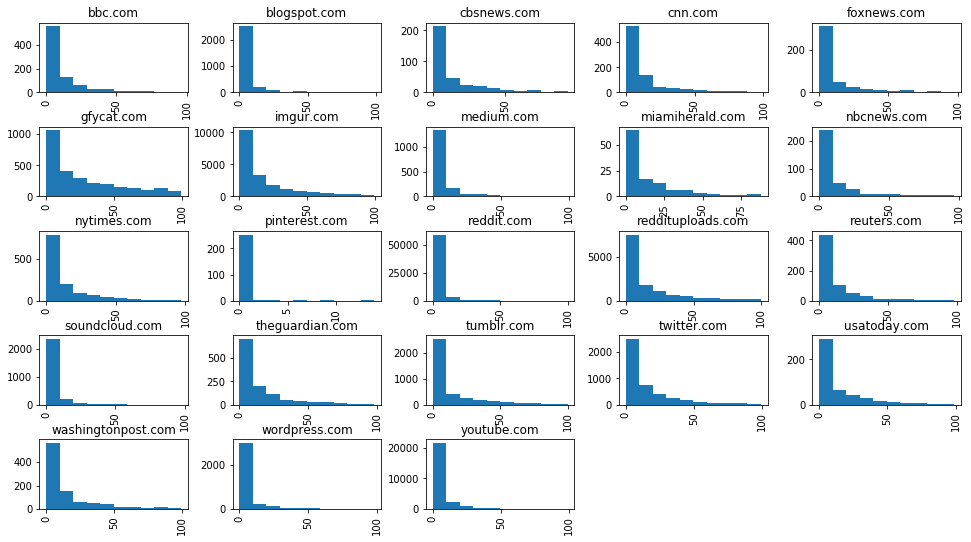

In [42]:
#Histogram of score distribution for each websource across subreddit communities
subreddit_score_dat=subreddit_analysis_subset_dat.groupby(by=['subreddit_id','web_source'],as_index=False).agg({'score':'mean'})
plt.rcParams["figure.figsize"] = [16,9]
subreddit_score_dat['score'][subreddit_score_dat['score']<100].hist(by=subreddit_score_dat['web_source']);

In [43]:
#Find submission ids to retrieve comments for
submission_ids=subreddit_analysis_subset_dat["id"].unique()

In [44]:
#Number of Unique Subreddits
subreddit_analysis_subset_dat.subreddit_id.nunique()

86015

In [46]:
#Number of submissions per subreddit
submissions_by_comm=subreddit_analysis_subset_dat.groupby(['subreddit_id'],as_index=False).agg({'id':'nunique'})
submissions_by_comm=submissions_by_comm.sort_values(by=['id'],ascending =False)
submissions_by_comm
#Most Subreddits have less than 100 submissioms

,subreddit_id,id
49,t5_2qh1i,232720
75257,t5_3g4tc,195577
58492,t5_38unr,185717
78284,t5_3h4d8,165601
38548,t5_2y6r4,115227
40788,t5_2z2po,95736
79016,t5_3h9d4,65021
14852,t5_2szyo,64365
46,t5_2qh1e,55685
41374,t5_2zc5x,55375


In [47]:
#Number of Subreddits with greater than 30 submissions- About 14% of total
print(sum(submissions_by_comm['id']>30))
print(sum(submissions_by_comm['id'][submissions_by_comm['id']>30]))
print(sum(submissions_by_comm['id']>30)/len(submissions_by_comm))

11656
6177599
0.1355112480381329


In [ ]:
subreddits_dat = pd.read_json("subreddits.json.gz",compression="gzip")

###--------------------------ALL THESE LINES OF CODES BELOW ARE NOT NECESSARY--------------------------------

In [18]:
# def getPushShiftCommentData(sub_id):
#     '''Returns an array of comments for a given submission ID'''
#     url='https://api.pushshift.io/reddit/submission/comment_ids/'+str(sub_id)
#     r=requests.get(url)
#     data=json.loads(r.text)
#     comment_ids=data["data"]
    
#     while(len(comment_ids)>0):
        
#         if(len(comment_ids)>=1000):
#             comment=",".join(comment_ids[0:1000])
#             comment_ids=comment_ids[1000:]
#         else:
#             comment=",".join(comment_ids)
        
#         comment_json_url="https://api.pushshift.io/reddit/comment/search?ids="+str(comment)
#         r=requests.get(comment_json_url)
#         data=json.loads(r.text)
        
#         if(data["data"]!=None and data["data"]!=[]):
            
#             for data in data["data"]:
                
#                 comment_dict["link_id"].append(sub_id)
#                 comment_dict["id"].append(data['id'])
#                 comment_dict["subreddit_id"].append(data['subreddit_id'])
#                 comment_dict["parent_id"].append(data['parent_id'])
#                 comment_dict["created_utc"].append(datetime.datetime.fromtimestamp(data['created_utc']))
#                 comment_dict["author"].append(data["author"])
                
#                 if("score" in data.keys()):
#                     comment_dict["score"].append(data["score"])
#                 else:
#                     comment_dict["score"].append('')
                    
#                 comment_dict["body"].append(data["body"])

In [19]:
# comment_dict={"id":[],
#              "body":[],
#              "link_id":[],
#               "score":[],
#              "author":[],
#              "subreddit_id":[],
#              "parent_id":[],
#              "created_utc":[],
#              }
# i=0
# for sub_id in submission_ids:
    
#     if(i%1000==0):
#         print(i)
#     i+=1
    
#     getPushShiftCommentData(sub_id) 

In [20]:
#Reading Comments
# cmnt_bz_file = bz2.BZ2File('RC_2016-11.bz2')

# comment_dict={"id":[],
#              "body":[],
#              "link_id":[],
#               "score":[],
#              "author":[],
#              "subreddit":[],
#              "subreddit_id":[],
#              "parent_id":[],
#              "created_utc":[],
#              }

# i=0
# for line in tqdm(cmnt_bz_file):
#     cmnt_json=json.loads(line.decode("utf-8"))
#     if cmnt_json!=None and cmnt_json!={} :
#     #and re.search(news_source,subreddit_json["url"])!=None:
#         if(i%100000==0):
#             print(i)
#         i+=1
        
#         if("subreddit_id" not in cmnt_json.keys() or cmnt_json["link_id"] not in submission_ids):
#             continue
            
#         comment_dict["id"].append(cmnt_json["id"])
#         comment_dict["body"].append(cmnt_json["body"])
#         comment_dict["link_id"].append(cmnt_json["link_id"])
#         comment_dict["score"].append(cmnt_json["score"])
#         comment_dict["author"].append(cmnt_json["author"])
#         comment_dict["subreddit"].append(cmnt_json["subreddit"])
#         comment_dict["subreddit_id"].append(cmnt_json["subreddit_id"])
#         comment_dict["parent_id"].append(cmnt_json["parent_id"])
#         comment_dict["created_utc"].append(cmnt_json["created_utc"])
        
# # Comments data frame
# comment_dat=pd.DataFrame(comment_dict)

# #Saving to CSV file
# comment_dat.to_csv("Comments_Nov2016", sep=',', encoding='utf-8')

In [25]:
#subreddit_dat['url_domain']=subreddit_dat['url'].str.extract(news_source)

In [100]:
#news_source="((news\.yahoo\.com)|(news\.google\.com)|(huffpost\.com)|(cnn\.com)|(nytimes\.com))"

In [26]:
#subreddit_dat.groupby(['url_domain']).agg({"id":"nunique"})

In [74]:
#Restrict to subreddits with >30 submissions, for further comment extractions
#subreddit_fltr=submissions_by_comm['subreddit_id'][submissions_by_comm['id']>30]
#subreddt_ids_to_extract=subreddit_dat['id'][subreddit_dat['subreddit_id'].isin(subreddit_fltr)]

In [28]:
#Summary statistics
#submissions_by_comm['id'].describe()

In [42]:
# reddit_dict_data=[]
# for line in open('RS_2011-01','r'):
#     #print(line)
#     json_line=json.loads(line.decode("utf-8"))
#     #print(json_line)
#     reddit_dict_data.append(json_line)

In [174]:
# def getPushshiftData(after, before, sub):
#     '''This function returns JSON data from sub-reddit between the specified date range'''
#     url = 'https://api.pushshift.io/reddit/search/submission/?size=1000&after='+str(after)+'&before='+str(before)+'&subreddit='+str(sub)
#     r = requests.get(url)
#     data = json.loads(r.text)
#     return data['data']

In [176]:
# def collectSubData(subm):
#     '''This function appends submission to submission dictionary'''
#     subDict["sub_id"].append(subm['id'])
#     subDict["title"].append(subm['title'])
#     subDict["url"].append(subm['url'])  
#     subDict["author"].append(subm['author'])
#     subDict["score"].append(subm['score'])
#     subDict["created_ts"].append(datetime.datetime.fromtimestamp(subm['created_utc']))
#     subDict["num_comments"].append(subm['num_comments'])
#     subDict["body"].append(subm['selftext'])
#     comments_data=getPushShiftCommentData(subm['id'])
#     for comment in comments_data:
#         commentDict["sub_id"].append(subm['id'])
#         commentDict["comm_id"].append(comment['id'])
#         commentDict["created_ts"].append(datetime.datetime.fromtimestamp(comment['created_utc']))
#         commentDict["author"].append(comment["author"])
#         commentDict["score"].append(comment["score"])
#         commentDict["body"].append(comment["body"])

In [177]:
#Subreddit to query
# sub='datascience'
# #before and after dates
# before = int(datetime.datetime(2018,12,31,0,0).timestamp())
# after = int(datetime.datetime(2018,1,1,0,0).timestamp())
# subCount = 0
# subDict={ "sub_id":[],"title":[],  "url":[],"author":[] ,"score":[], "created_ts": [],"num_comments": [], "body":[]}
# commentDict={ "sub_id": [],"comm_id":[], "created_ts":[],"author":[],"score":[],"body":[] }

In [29]:
#Loop through untlil all data in time range is extracted for the specified subreddit
# data = getPushshiftData(after, before, sub)
# while len(data) > 0:
#     for submission in data:
#         collectSubData(submission)
#         subCount+=1
        
#     # Calls getPushshiftData() with the created date of the last submission
#     print(len(data))
#     print(str(datetime.datetime.fromtimestamp(data[-1]['created_utc'])))
#     after = data[-1]['created_utc']
#     data = getPushshiftData(after, before, sub)
    
# print(len(data))

# #Create a Data Frame of Submissions
# subDat=pd.DataFrame(subDict)

# #Create a Data Frame of Comments
# commentDat=pd.DataFrame(commentDict)